<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/cangokalp/EE-460J/blob/master/lab_1/lab_1.ipynb#scrollTo=04WVDXBKOy-b"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

sns.set(style="white", color_codes=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Programming Questions

## Problem 1

In [ ]:
g1 = np.random.normal(-10,5,1000)
g2 = np.random.normal(10,5,1000)

> a)

Text(0.5, 1.0, 'Histogram of sum of the two Gaussians')

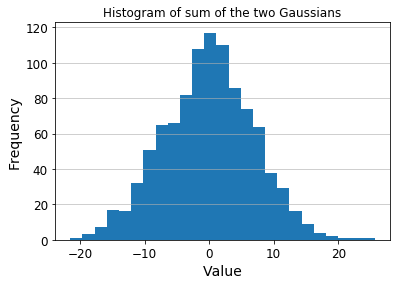

In [ ]:
sum_g = g1 + g2
plt.hist(sum_g, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sum of the two Gaussians')

the new mean is around zero

> b)

In [ ]:
est_mean = np.mean(sum_g)
est_variance = np.var(sum_g)
print('mean: {}, variance: {}'.format(est_mean, est_variance))

mean: -0.05377603039763575, variance: 56.158964813801795


## Problem 2

Text(0.5, 1.0, 'n=250')

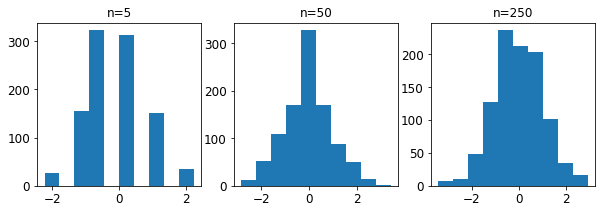

In [ ]:
def drawZ(n, num_draws=1000):
    z = []
    for i in range(num_draws):
        x = np.random.binomial(1,0.5,size=n)
        x[x==0] = -1
        z.append(1/np.sqrt(n)*sum(x))
    return z

Z_5 = drawZ(5)
Z_50 = drawZ(50)
Z_250 = drawZ(250)

fig, axs = plt.subplots(1, 3, figsize=(10,3));
axs[0].hist(Z_5)
axs[0].set_title('n=5')
axs[1].hist(Z_50)
axs[1].set_title('n=50')
axs[2].hist(Z_250)
axs[2].set_title('n=250')


## Problem 3

In [ ]:
num_samples = 25000
gd = np.random.normal(0,5,num_samples)
est_mean = gd.sum()/num_samples
est_var = (1.0/num_samples-1)*(np.sum((gd - est_mean)**2))
est_std = np.sqrt(gd_var)
print('mean: {}, std: {}'.format(est_mean, est_std))

mean: 0.010444171610128873, std: 5.017196540955754


## Problem 4

In [ ]:
num_samples = 10000
mean = np.array([-5,5])
cov = np.matrix([[20, .8],[.8, 30]])
mvn = np.random.multivariate_normal(mean, cov, num_samples)
est_mean = mvn.sum(axis=0, keepdims=True)/num_samples
cent = mvn - est_mean
est_cov = (1.0/(num_samples-1))*np.dot(cent.T, cent)
print('mean: {} \n\n cov: {}'.format(est_mean, est_cov))

mean: [[-4.98824049  4.98910618]] 

 cov: [[20.10127783  0.53561709]
 [ 0.53561709 29.89813564]]


## Problem 5

In [ ]:
df = pd.read_csv('PatientData.csv', header=None, na_values='?')
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.dtypes.value_counts()

int64      155
float64    125
dtype: int64

In [ ]:
df=df.rename(columns = {279:'condition'})
target_perc = pd.DataFrame(df.condition.value_counts())
target_perc['Percentage'] = 100*df.condition/df.shape[0]
target_perc

,condition,Percentage
1,245,1.327434
10,50,0.663717
2,44,2.212389
6,25,0.221239
16,22,2.212389
4,15,1.548673
3,15,0.221239
5,13,3.097345
9,9,2.212389
15,5,0.221239


>a

In [ ]:
print('number of patients: {}, number of features: {}'.format(df.shape[0],df.shape[1]))

number of patients: 452, number of features: 280


> b

In [ ]:
df.describe(include=[np.number])

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,condition
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
df2 = df.iloc[:,[0,1,2,3,279]]
df2.sort_values(by=2, ascending=False)

,0,1,2,3,condition
141,1,1,780,6,5
316,0,0,608,10,5
0,75,0,190,80,8
4,75,0,190,80,7
448,37,0,190,85,10
...,...,...,...,...,...
401,9,0,120,25,14
379,8,0,120,28,10
424,7,0,119,21,9
60,1,0,110,10,5


it seems like for feature 2 - 780 and 608 was an input error - replace them by mean of the entries similar to those data points. 

In [ ]:
weird_indices = df2[df2[2]>=500].index.values
df2.iloc[weird_indices,:]

,0,1,2,3,condition
141,1,1,780,6,5
316,0,0,608,10,5


In [ ]:
df3 = df2[(df2[0]<5) & (df['condition']==5)]
df3 = df3.drop(weird_indices)
df3

,0,1,2,3,condition
60,1,0,110,10,5
320,3,0,105,12,5


In [ ]:
df2.iloc[weird_indices,2] = df3[2].mean()
df2.sort_values(by=2, ascending=False)

,0,1,2,3,condition
0,75,0,190.0,80,8
4,75,0,190.0,80,7
448,37,0,190.0,85,10
332,42,0,188.0,91,16
346,20,0,186.0,66,10
...,...,...,...,...,...
424,7,0,119.0,21,9
60,1,0,110.0,10,5
316,0,0,107.5,10,5
141,1,1,107.5,6,5


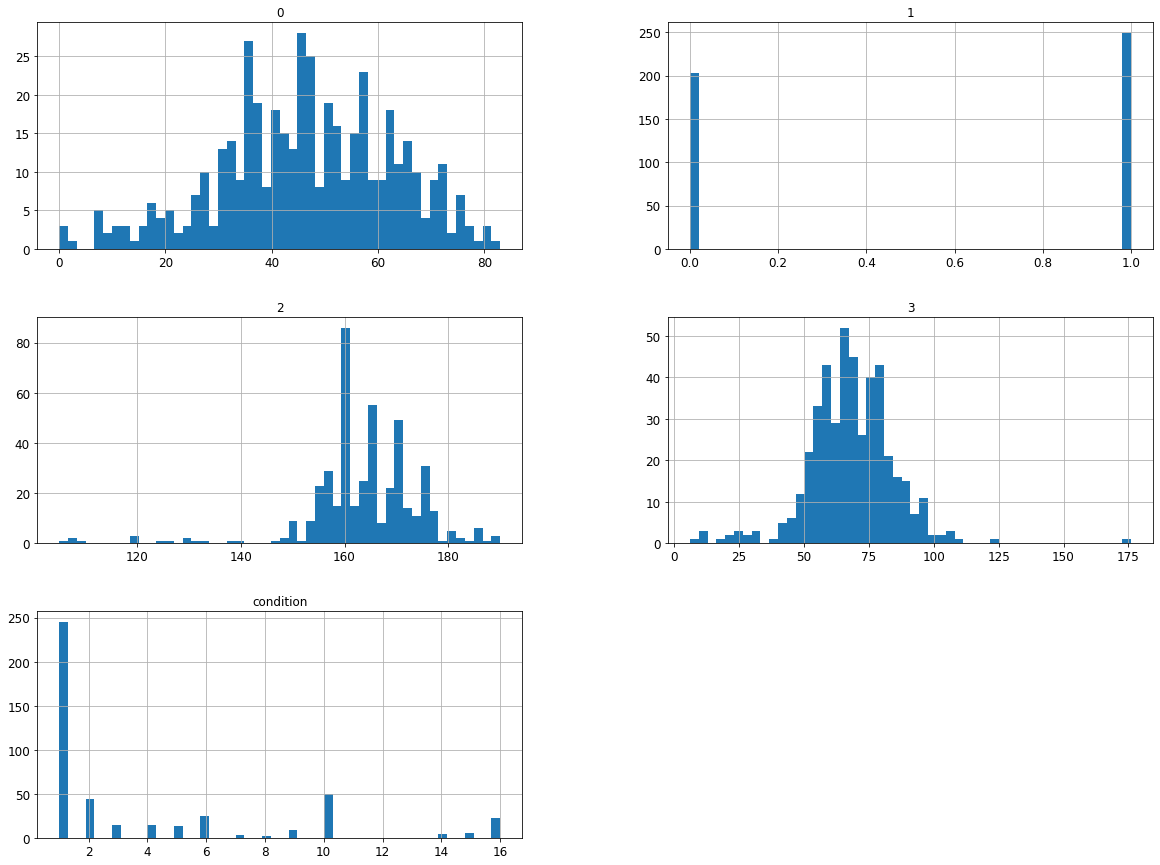

In [ ]:
df2.hist(bins=50, figsize=(20,15));

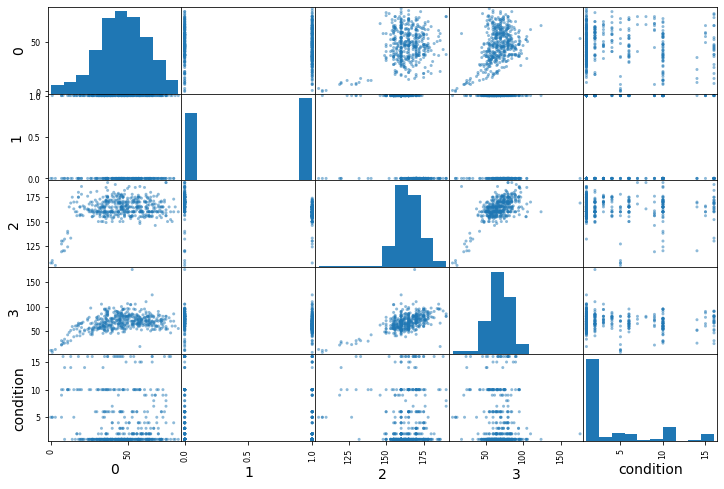

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, figsize=(12, 8));

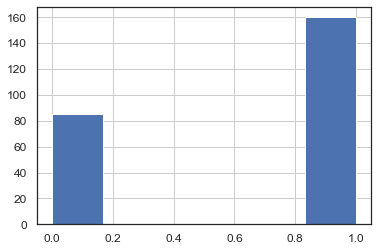

In [ ]:
# sns.FacetGrid(df2, hue="condition", size=6).map(plt.hist, 0).add_legend()
# plt.title('0 vs condition')
# plt.show()
# df2[df2.condition==1][1].hist(bins=6)


Maybe 0: age, 1: sex, 2:height in cm, 3: weight in kg

> c

In [ ]:
print('number of n/a values: {}'.format(df.isnull().sum().sum()))
df.fillna(df.mean(), inplace=True)

number of n/a values: 408


In [ ]:
print('(check) number of n/a values: {}'.format(df.isnull().sum().sum()))

(check) number of n/a values: 0


> d

Three most important features;

# Written Questions

## Problem 1

In [ ]:
data = [[1/4.0, 1/4.0],[1/6.0, 1/3.0]]
df = pd.DataFrame(data, columns=['X=0','X=1'], index=['Y=0','Y=1'])
df

,X=0,X=1
Y=0,0.250000,0.250000
Y=1,0.166667,0.333333


In [ ]:
print('a) prob X=1: {}'.format(df['X=1'].sum()))
print('b) prob X=1|Y=1: {}'.format(df.loc['Y=1', 'X=1']))
mean_x = df['X=1'].sum()
var_x = df['X=0'].sum()*(0-mean_x)**2 + df['X=1'].sum()*(1-mean_x)**2
print('c) variance of X: {}'.format(var_x))
mean_x_cond = df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']
var_x_cond = df.loc['Y=1','X=0']/df.sum(axis=1)['Y=1']*(0-mean_x_cond)**2 + df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']*(1-mean_x_cond)**2
print('d) variance of X|Y=1: {}'.format(var_x_cond))
e_first_term = e_second_term = df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']
e_third_term = 1
print('e) {}'.format(e_first_term+e_second_term+e_third_term))

a) prob X=1: 0.5833333333333333
b) prob X=1|Y=1: 0.3333333333333333
c) variance of X: 0.24305555555555552
d) variance of X|Y=1: 0.2222222222222222
e) 2.333333333333333


## Problem 2

## Problem 3

In [ ]:
print('tool: the normal approximation to binomial')
n = 100
p = 2/3.0
z = (50+0.5-n*p)/(np.sqrt(n*p*(1-p)))
import scipy.stats as st
print('prob of getting 50 or fewer heads: {}'.format(st.norm.cdf(z)))

tool: the normal approximation to binomial
prob of getting 50 or fewer heads: 0.00030238299493064023


In [ ]:
for i in range(10000):
    x=np.random.binomial(1,2/3.0,100)
    if x.sum() < 50:
        print('less than 50')

less than 50
less than 50
less than 50
